In [74]:
import pandas as pd
import numpy as np
import os
import pickle
import datasets
from sklearn.model_selection import train_test_split

from machine_learning.rf.text_feature_extractor import TextFeatureExtractor
from xai.shap_individual import SHAPIndividual
import shap
import matplotlib.pyplot as plt

In [2]:
def _retrieve_model(path="model_rf.pkl"):
    cache = f"model/{path}"
        
    # Check if cached file exists
    if os.path.exists(cache):
        with open(cache, "rb") as f:
            print("Loading cached Model...")
            model = pickle.load(f)
            return model
    else:
        print("No model found. Train a model first, to explain it.")
        return None

Loading cached DataFrame...
(14695, 7)
(14695, 15390)
(5, 15390)
Loading cached Model...
['00' '000' '007' ... 'Dependency Depth' 'Length' 'sentiment']
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.23038992e-03  2.30400413e-05  1.30709177e-03 -2.23390821e-03
   -1.35629039e-03  1.02967697e-03]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-7.42557979e-04 -4.39425707e-04 -1.58644251e-03  3.34418734e-05
    2.86532032e-04  2.44845246e-03]
  [-1.90943356e-03 -3.90265458e-03 -6.14312834e-04  1.92647397e-03
   -1.98981215e-04  4.69890836e-03]
  [-3.27409021e-03 -2.21701583e-03  2.88659998e-04 -2.11192780e-03
   -8.60578545e-04  8.17495239e-03]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.39928704e-03  3.03445613e-04  3.53581169e-04 -1.27374752e-03
   -1.22398815e-03  4.41421896e-04]
  [ 0.00000000e+

<Figure size 640x480 with 0 Axes>

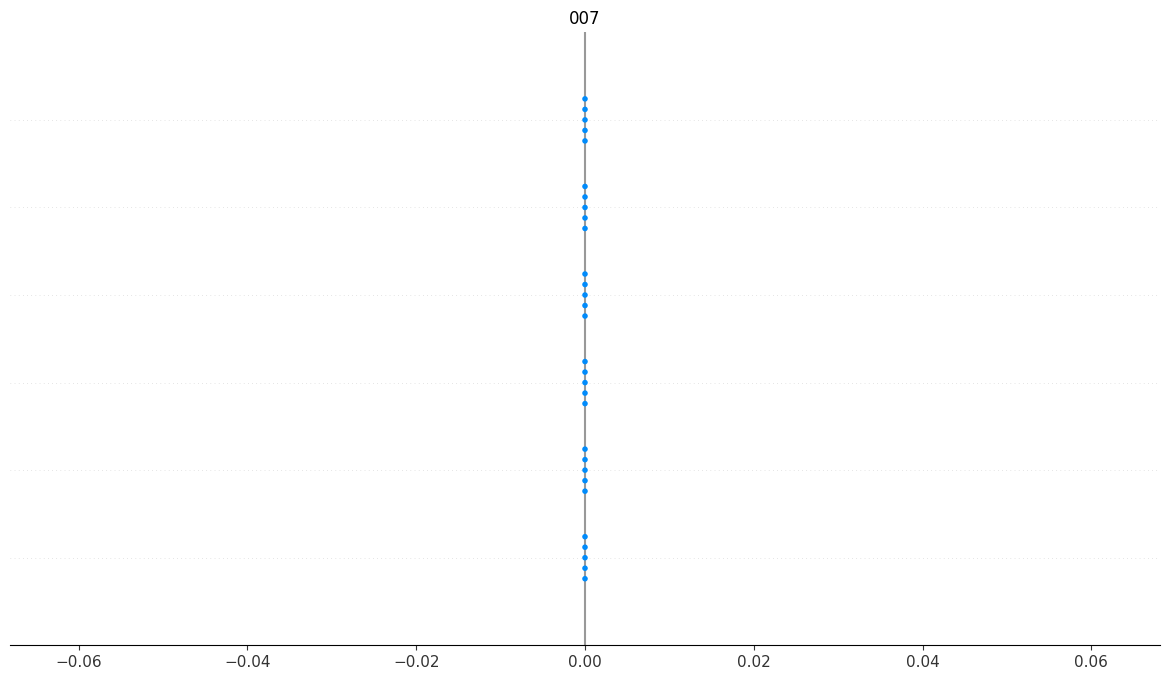

In [79]:
dataset = "chengxuphd/liar2"
dataset = datasets.load_dataset(dataset)
train_raw = pd.DataFrame(dataset["train"])

X_train, X_test, y_train, y_test = train_test_split(train_raw['statement'].to_list(), train_raw['label'].to_list(), test_size=0.2, random_state=42)

extractor = TextFeatureExtractor(X_train)

bow_features = extractor.extract_bow_features(X_train)
meta_features, meta_feature_names = extractor.extract_meta_features(X_train)

bow_feature_names = extractor.vectorizer.get_feature_names_out()

# Combine features
combined_features = np.hstack((bow_features, meta_features))

print(combined_features.shape)
print(combined_features[:5].shape)

model = _retrieve_model()

shap_explainer = SHAPIndividual(model, background_data=combined_features[:1000], bow_feature_names=bow_feature_names, meta_feature_names=meta_feature_names)
shap_explainer.explain(combined_features[1000:1005])

In [80]:
shap.plots.text(shap_explainer.shap_values[3])

AttributeError: 'numpy.ndarray' object has no attribute 'output_names'

In [82]:
print(model.predict(combined_features[1000:1005]))
print(y_train[1000:1005])

[5 0 1 1 4]
[5, 0, 1, 1, 4]


In [83]:
tokens = list(map(extractor.vectorizer.build_tokenizer(),X_train))[1000]

In [84]:
combined_feature_names = list(bow_feature_names) + list(meta_feature_names)

In [85]:
shap_values = shap_explainer.shap_values[0]

In [86]:
shap_values.shape

(15390, 6)

In [92]:
tokens = [token.lower() for token in tokens]

In [93]:
for i, elem in enumerate(shap_values):
    if combined_feature_names[i] in tokens or combined_feature_names[i] in meta_feature_names:
        print(f"{combined_feature_names[i]}: {elem[5]}")

and: 0.009520081331493202
assistance: -6.626985856200918e-05
companies: 0.001920003793691194
contracts: 2.4999998859129847e-05
foreign: 0.012663645163361253
form: 0.008685792419582868
given: 0.002525053914155251
grants: 0.021410498915138305
in: 0.0103257155554752
is: -0.0008986595655079555
most: 0.01647429577924413
nonprofits: 0.004534500427544117
of: 0.013261653070272814
the: 0.0012907544522579428
to: -0.0002260586905725859
Lexical Diversity (TTR): 0.015331082214889874
Average Word Length: 0.0026972403004458557
Avg Syllables per Word: 0.0020794251487274095
Difficult Word Ratio: 0.006807496235708186
Dependency Depth: 0.0024484524626359415
Length: 0.004698908359230245
sentiment: 0.008174952394310821


In [32]:
# Visualize SHAP values for the first sample
print("SHAP Explanation for the first sample:")
shap.summary_plot(shap_values, combined_features[0], feature_names=combined_feature_names)

SHAP Explanation for the first sample:


IndexError: tuple index out of range

<Figure size 640x480 with 0 Axes>